In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
df = pd.read_csv("health_train.csv")

In [3]:
df

,age,sex,bmi,smoker,region,children,charges
0,21.000,male,25.745,no,northeast,2,3279.869
1,36.977,female,25.744,yes,southeast,3,21454.494
2,18.000,male,30.030,no,southeast,1,1720.354
3,37.000,male,30.677,no,northeast,3,6801.438
4,58.000,male,32.010,no,southeast,1,11946.626
...,...,...,...,...,...,...,...
2495,31.058,male,27.555,no,southeast,4,5889.104
2496,36.834,male,30.322,no,northeast,3,6788.534
2497,56.000,female,36.180,no,northwest,2,12401.747
2498,49.000,male,36.430,no,northwest,3,10376.295


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2500 non-null   float64
 1   sex       2500 non-null   object 
 2   bmi       2500 non-null   float64
 3   smoker    2500 non-null   object 
 4   region    2500 non-null   object 
 5   children  2500 non-null   int64  
 6   charges   2500 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 136.8+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2500.000,39.003,12.265,18.000,28.846,39.350,48.689,64.000
bmi,2500.000,30.575,5.390,15.960,26.718,30.200,34.046,53.130
children,2500.000,2.488,1.707,0.000,1.000,2.000,4.000,5.000
charges,2500.000,12679.312,10593.270,1121.874,5612.781,9455.047,14440.628,63770.428


In [6]:
for col in df.select_dtypes('object'):
    print(f"{col:<6}:", df[col].nunique())

sex   : 2
smoker: 2
region: 4


<AxesSubplot:>

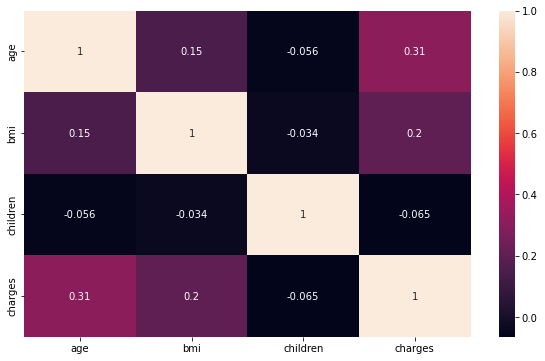

In [7]:
sns.heatmap(df.select_dtypes(include ="number").corr(), annot =True)

<AxesSubplot:xlabel='charges'>

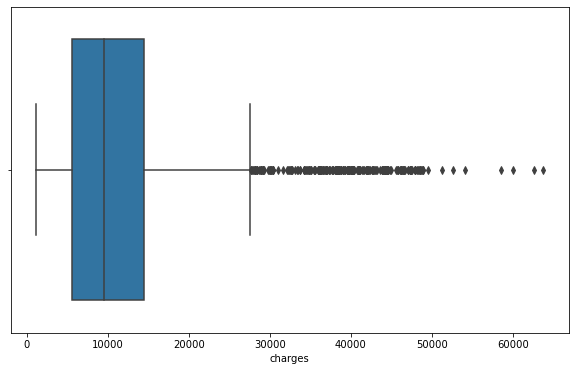

In [8]:
sns.boxplot(df.charges)

In [9]:
df.duplicated().value_counts()

False    2500
dtype: int64

<AxesSubplot:xlabel='bmi'>

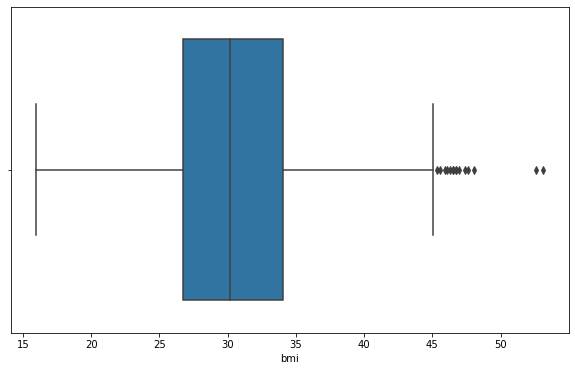

In [19]:
sns.boxplot(df.bmi)

<AxesSubplot:ylabel='Frequency'>

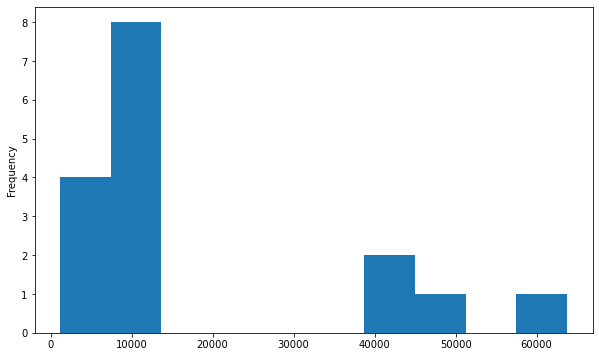

In [20]:
df[df.bmi>45].charges.plot(kind="hist")

In [12]:
df2 = df[df.bmi<45]

<AxesSubplot:xlabel='bmi'>

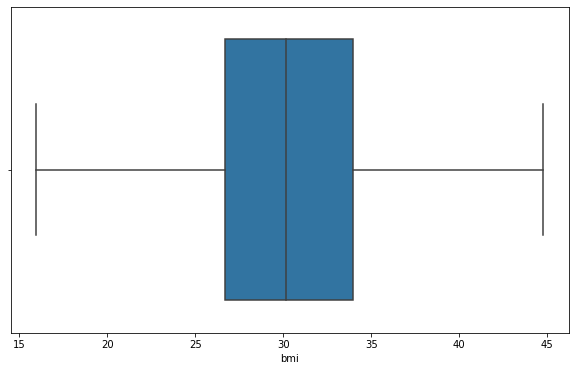

In [21]:
sns.boxplot(df2.bmi)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2484 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2484 non-null   float64
 1   sex       2484 non-null   object 
 2   bmi       2484 non-null   float64
 3   smoker    2484 non-null   object 
 4   region    2484 non-null   object 
 5   children  2484 non-null   int64  
 6   charges   2484 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 155.2+ KB


<AxesSubplot:>

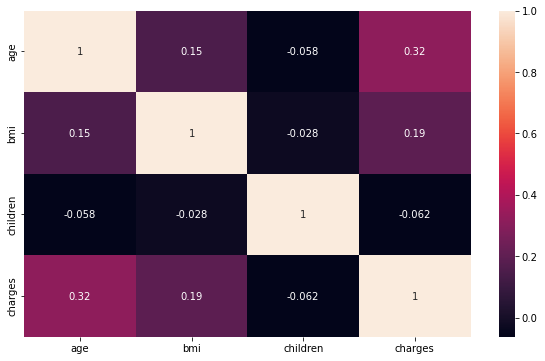

In [22]:
sns.heatmap(df2.select_dtypes(include ="number").corr(), annot =True)

<AxesSubplot:>

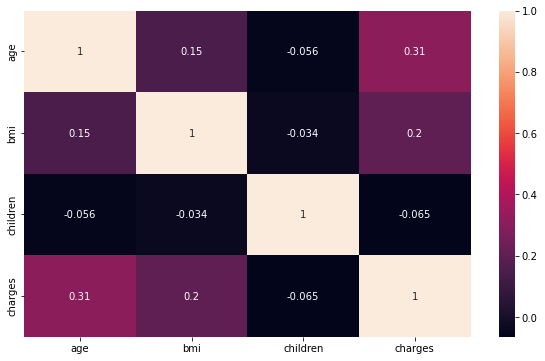

In [24]:
sns.heatmap(df.select_dtypes(include ="number").corr(), annot =True)

<AxesSubplot:xlabel='children'>

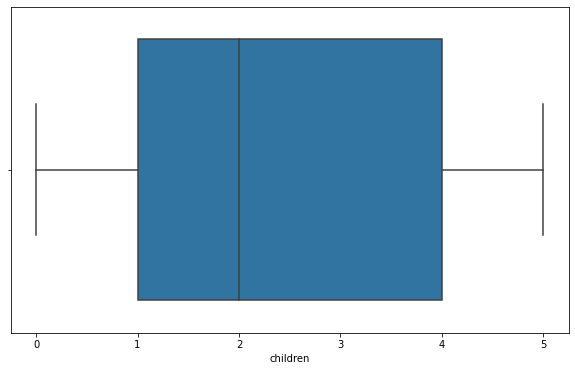

In [17]:
sns.boxplot(df2.children)

<AxesSubplot:xlabel='age'>

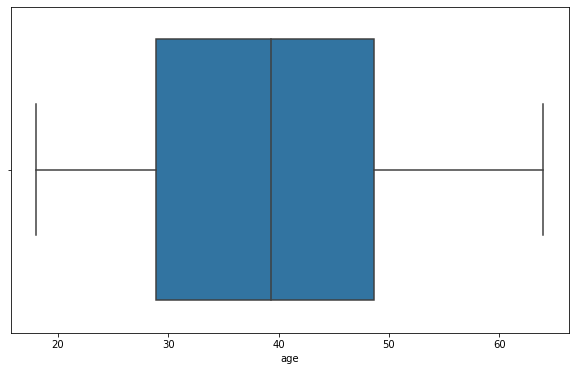

In [18]:
sns.boxplot(df2.age)

In [19]:
df.columns

Index(['age', 'sex', 'bmi', 'smoker', 'region', 'children', 'charges'], dtype='object')

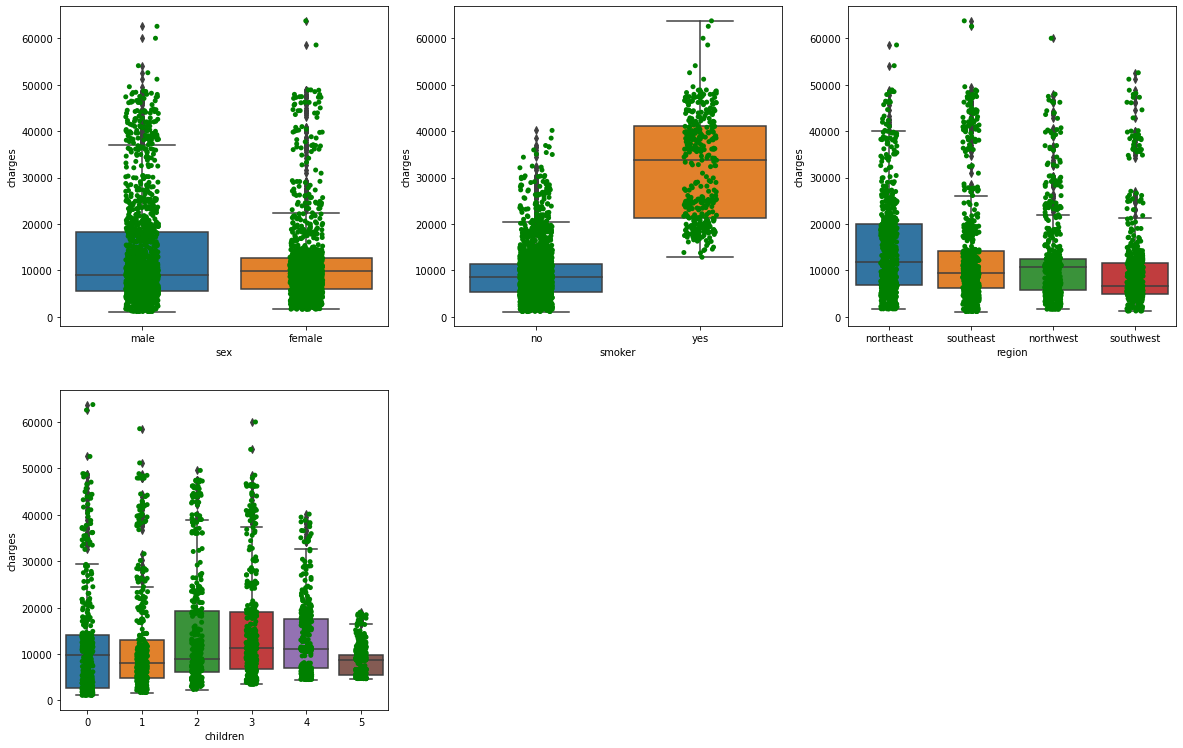

In [25]:
index = 0
plt.figure(figsize=(20,20))
for feature in ['sex','smoker', 'region', 'children', 'charges']:
    if feature != "charges":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x=feature, y='charges', data=df)
        sns.stripplot(x=feature, y='charges', data=df, color= "g")

 # Test datası 

In [26]:
test = pd.read_csv("health_test.csv")

In [27]:
test.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       451 non-null    float64
 1   sex       451 non-null    object 
 2   bmi       451 non-null    float64
 3   smoker    451 non-null    object 
 4   region    451 non-null    object 
 5   children  451 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 21.3+ KB


# Train/Test

In [28]:
X= df2.drop(columns="charges")   
y= df2.charges

In [29]:
cat = X.select_dtypes("object").columns     #encoder
cat

Index(['sex', 'smoker', 'region'], dtype='object')

In [30]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,age,sex,bmi,smoker,region,children
0,21.000,1.000,25.745,0.000,0.000,2
1,36.977,0.000,25.744,1.000,2.000,3
2,18.000,1.000,30.030,0.000,2.000,1
3,37.000,1.000,30.677,0.000,0.000,3
4,58.000,1.000,32.010,0.000,2.000,1


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [30]:
X_train.shape

(1987, 6)

In [31]:
X_test.shape

(497, 6)

In [32]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [30]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [31]:
DT_model = DecisionTreeRegressor(random_state=101)

In [32]:
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=101)

In [33]:
train_val(DT_model, X_train, y_train, X_test, y_test)

,train,test
R2,1.000,0.764
mae,0.000,1992.582
mse,0.000,26104244.240
rmse,0.000,5109.231


In [34]:
from sklearn.model_selection import cross_validate, cross_val_score
model = DecisionTreeRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                                    0.774
test_neg_mean_absolute_error           -1920.515
test_neg_mean_squared_error        -24102058.755
test_neg_root_mean_squared_error       -4897.206
dtype: float64

In [35]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
sex,0.005
region,0.044
children,0.054
age,0.123
bmi,0.180
smoker,0.594


# Random Forest

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
rf_model = RandomForestRegressor(random_state=101)
rf_model.fit(X_train,y_train)
train_val(rf_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.981,0.882
mae,680.139,1768.704
mse,2127168.054,13074858.536
rmse,1458.481,3615.917


In [100]:
df_f_i = pd.DataFrame(index=X.columns, data = rf_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
sex,0.006
region,0.039
children,0.061
age,0.129
bmi,0.174
smoker,0.592


# GridSearch CV

In [33]:
from sklearn.model_selection import GridSearchCV

In [102]:
model = RandomForestRegressor(random_state=101)

In [103]:
param_grid = {"n_estimators":[200, 500],
              "max_depth": [None, 4, 5, 6, 7,8],
              "min_samples_leaf": [1, 2, 3, 4],
              "min_samples_split": [2, 3, 5, 6],
              "max_features":['auto', len(df)/3, 2, 4]}

In [104]:

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [105]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 833.3333333333334, 2, 4],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 5, 6],
                         'n_estimators': [200, 500]},
             scoring='neg_root_mean_squared_error')

In [106]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.963,0.891
mae,960.239,1745.143
mse,4094737.660,12068456.951
rmse,2023.546,3473.968


In [107]:
grid_model.best_params_

{'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [108]:
from sklearn.model_selection import cross_validate, cross_val_score

model = RandomForestRegressor(random_state=101, max_depth = None,
             max_features= 4,
             min_samples_leaf = 1,
             min_samples_split= 5,
             n_estimators= 200)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv = 10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                                    0.865
test_neg_mean_absolute_error           -1855.338
test_neg_mean_squared_error        -14558392.961
test_neg_root_mean_squared_error       -3799.937
dtype: float64

# XGboost

In [34]:
from xgboost import XGBRegressor

In [110]:
xgb_model = XGBRegressor(random_state=101, objective="reg:squarederror") #objective="reg:squarederror"

In [111]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [112]:
train_val(xgb_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.993,0.857
mae,511.134,2127.558
mse,799660.754,15791075.949
rmse,894.238,3973.799


In [113]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.838
test_neg_mean_absolute_error           -2140.953
test_neg_mean_squared_error        -17411135.150
test_neg_root_mean_squared_error       -4162.528
dtype: float64

In [115]:
param_grid = {"n_estimators":[100, 300,500],'max_depth':[3,5,6,7], "learning_rate": [0.05, 0.1, 0.2],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [116]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [117]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=101, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
 

In [118]:
grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.05,
 'max_depth': 6,
 'n_estimators': 100,
 'subsample': 1}

In [119]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.934,0.891
mae,1327.728,1756.160
mse,7286803.836,12071478.751
rmse,2699.408,3474.403


# Feature importance

In [120]:
model = XGBRegressor(random_state=101, objective="reg:squarederror",learning_rate=0.05, max_dept=6, subsample=1)
model.fit(X_train, y_train)

[19:54:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_dept" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_dept=6, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [121]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['xgb_Importance'])
xgb_imp_feats = imp_feats.sort_values('xgb_Importance')
xgb_imp_feats

,xgb_Importance
sex,0.003
age,0.009
children,0.012
bmi,0.014
region,0.015
smoker,0.947


# New model

In [36]:
X_new = X[["smoker", "region"]]

In [37]:
X_new

,smoker,region
0,0.000,0.000
1,1.000,2.000
2,0.000,2.000
3,0.000,0.000
4,0.000,2.000
...,...,...
2495,0.000,2.000
2496,0.000,0.000
2497,0.000,1.000
2498,0.000,1.000


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=101)

In [39]:
model = XGBRegressor(random_state=101, objective="reg:squarederror",learning_rate=0.05, max_dept=6, subsample=1)

In [40]:
model.fit(X_train, y_train)

[17:54:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_dept" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_dept=6, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
train_val(model, X_train, y_train, X_test, y_test)

,train,test
R2,0.618,0.577
mae,4768.403,5205.977
mse,42138183.547,46760378.457
rmse,6491.393,6838.156


# Final Model

''' param_grid = {"n_estimators":100,'max_depth':6, "learning_rate": 0.05,
             "subsample":1, "colsample_bytree":1}'''

In [43]:
final_model = XGBRegressor(random_state=101, n_estimators=100, max_depth = 6, learning_rate = 0.05,
             subsample = 1, colsample_bytree =1,  objective="reg:squarederror")

In [44]:
final_model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# test data encoder

In [45]:
enc = OrdinalEncoder()
test[cat] = enc.fit_transform(test[cat])
test.head()

,age,sex,bmi,smoker,region,children
0,39.297,1.000,29.978,0.000,1.000,4
1,40.368,0.000,27.928,0.000,2.000,5
2,32.882,1.000,41.577,0.000,3.000,5
3,62.000,0.000,30.495,0.000,1.000,2
4,32.476,1.000,30.323,1.000,0.000,4


In [46]:
final_pred=final_model.predict(test)

In [47]:
final_pred

array([ 8336.655 ,  9350.617 ,  6390.451 , 15763.419 , 33877.92  ,
        6744.1016, 10137.772 ,  9624.716 ,  9588.571 ,  1829.4233,
       10534.171 ,  3828.1936, 12502.459 ,  8271.186 , 11625.326 ,
        6529.269 ,  7576.6274,  4958.951 ,  3509.394 , 38617.918 ,
        4497.32  , 12059.49  , 30804.785 , 31008.283 ,  8392.55  ,
        6049.6333, 14450.998 ,  3077.9321,  3705.9229, 25177.195 ,
        4882.6846,  5957.899 ,  4942.9097, 10466.57  , 37649.71  ,
        6138.259 , 18504.283 , 10633.828 , 10466.57  , 47960.8   ,
       15278.132 , 12307.723 , 18441.121 , 38250.957 ,  6233.161 ,
        6936.115 ,  6357.2886, 10961.382 , 14210.225 , 17158.    ,
       11696.39  ,  5003.805 , 12091.192 , 11025.405 , 10835.664 ,
       37162.383 ,  9519.089 , 11459.274 ,  8168.7573, 11085.392 ,
        5138.6997, 42204.73  , 39827.734 , 35411.656 , 10552.967 ,
        9913.963 ,  6836.546 ,  6110.887 ,  7204.3647, 38669.695 ,
       12634.491 ,  7956.664 ,  5934.718 , 12742.077 , 11110.3

In [170]:
submission = pd.DataFrame(final_pred)

In [171]:
submission.to_csv("C9106.csv", index =False )